In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport

import os

#!git clone https://github.com/ADPclass/ADP_book_ver01.git
for dirname, _, filenames in os.walk('ADP_book_ver01/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

ADP_book_ver01/data/titanic.csv
ADP_book_ver01/data/arima_data.csv
ADP_book_ver01/data/cats.csv
ADP_book_ver01/data/indian_liver_patient.csv
ADP_book_ver01/data/bodyPerformance.csv
ADP_book_ver01/data/breast-cancer.csv
ADP_book_ver01/data/iris.csv
ADP_book_ver01/data/lot_quality.csv
ADP_book_ver01/data/student-por.csv
ADP_book_ver01/data/groceries.csv
ADP_book_ver01/data/pre_student.csv
ADP_book_ver01/data/kc_house_data.csv
ADP_book_ver01/data/insurance.csv
ADP_book_ver01/data/spam.csv
ADP_book_ver01/data/avocado.csv
ADP_book_ver01/data/classification.csv
ADP_book_ver01/data/hotel_bookings.csv
ADP_book_ver01/data/diabetes_for_test.csv
ADP_book_ver01/data/Cars93.csv
ADP_book_ver01/data/mtcars.csv
ADP_book_ver01/data/USArrests.csv
ADP_book_ver01/data/cereal.csv
ADP_book_ver01/data/student-mat.csv
ADP_book_ver01/data/diabetes.csv
ADP_book_ver01/data/metalicity
ADP_book_ver01/data/credit_final.csv
ADP_book_ver01/data/CarPrice_Assignment.csv
ADP_book_ver01/data/Skyserver.csv
ADP_book_ver01/

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#1장 통계분석 
adms = pd.read_csv('datafiles/Admission.csv')
adms.tail()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
adms.describe()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
adms.columns  # LOR 컬럼명 뒤에 공백하나 있음에 유의

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [19]:
from scipy.stats import pearsonr, spearmanr 

In [23]:
c, p = pearsonr(adms['Chance_of_Admit'], adms['GRE']) # 결과값 : 상관계수, p-value
print(c, p)

0.8026104595903503 2.4581124141787826e-91


In [25]:
for col in ['GRE','TOEFL','Univ_Rating','SOP','LOR ']:
    print('상관계수 분석 : ', col)
    c, p = pearsonr(adms['Chance_of_Admit'], adms[col])
    print('상관계수: {}, p-value: {}'.format(c, p))
    print('\n')

상관계수 분석 :  GRE
상관계수: 0.8026104595903503, p-value: 2.4581124141787826e-91


상관계수 분석 :  TOEFL
상관계수: 0.7915939869351045, p-value: 3.6341021759970536e-87


상관계수 분석 :  Univ_Rating
상관계수: 0.7112502503917222, p-value: 6.635019480888702e-63


상관계수 분석 :  SOP
상관계수: 0.675731858388672, p-value: 1.1410946671023095e-54


상관계수 분석 :  LOR 
상관계수: 0.6698887920106938, p-value: 2.0073145197523104e-53




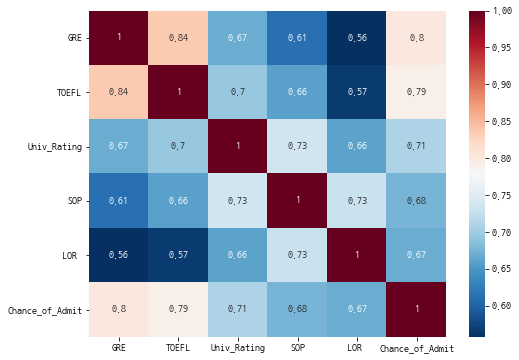

In [14]:
cor = adms[['GRE','TOEFL','Univ_Rating','SOP','LOR ','Chance_of_Admit']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, 
            xticklabels=cor.columns,
            yticklabels=cor.columns,
            cmap='RdBu_r', annot=True);

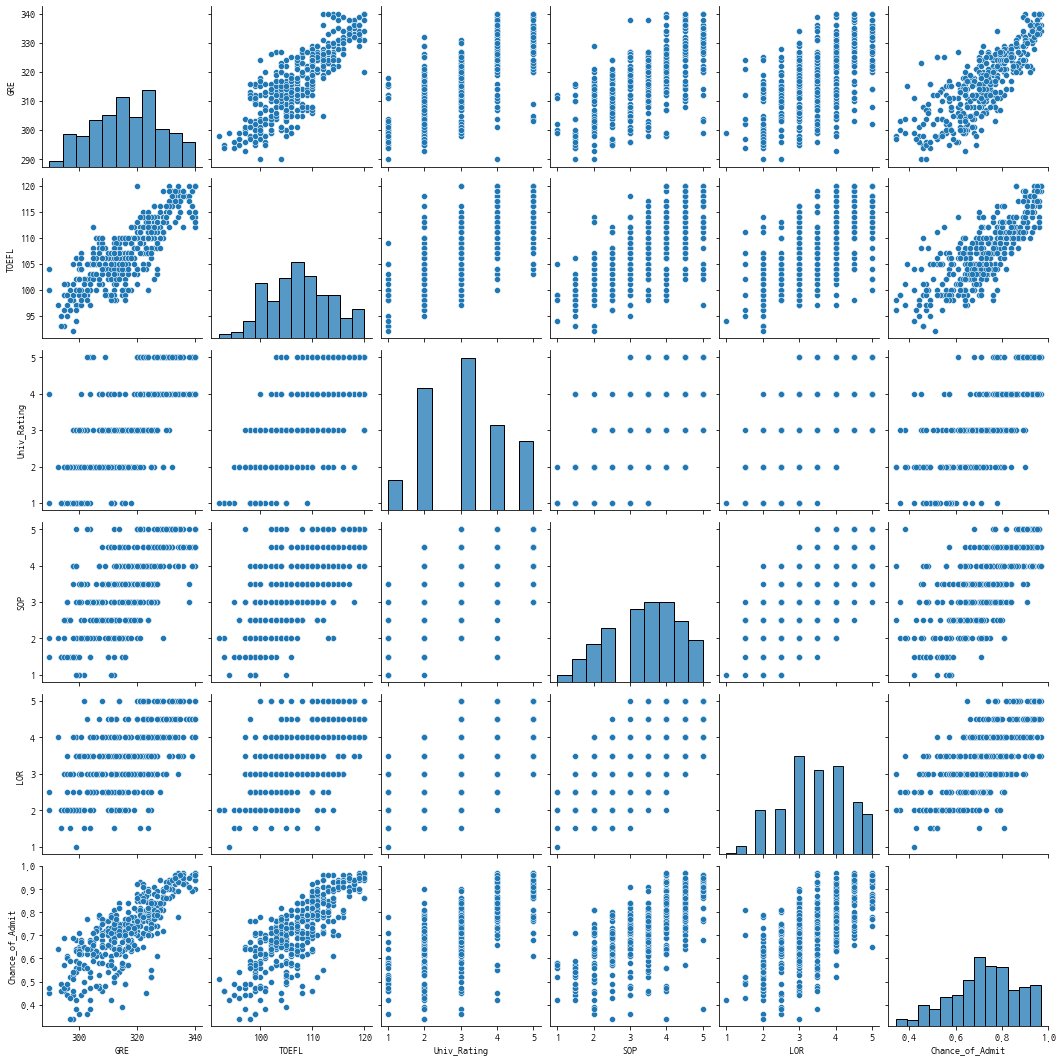

In [16]:
sns.pairplot(adms[['GRE','TOEFL','Univ_Rating','SOP','LOR ','Chance_of_Admit']], diag_kind='auto');

In [28]:
adms.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [37]:
# LOR컬럼에 맨뒤 공백 제거 (dmatrices 등 회귀모델에서 문제가 됨)
adms_re = adms.copy()
adms_re.rename(columns={'LOR ':'LOR'}, inplace=True)
adms_re.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [45]:
# 단계선택법 
# 회귀분석 단계적 선택법 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor 

y, X = dmatrices("Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + SOP + LOR + CGPA + Research", data=adms_re, return_type='dataframe')

In [46]:
# VIF 검증 (옵션) : 10이상이면 다중공선성 존재 -> 제거 필요
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['VIF', 'Variable'])

,VIF,Variable
0,4.615516,GRE
1,4.288959,TOEFL
2,2.919606,Univ_Rating
3,3.075504,SOP
4,2.431258,LOR
5,5.207403,CGPA
6,1.543312,Research


In [47]:
# full model 
model = smf.ols(formula="Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + SOP + LOR + CGPA + Research", data=adms_re) 
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          3.12e-134
Time:                        13:25:57   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GRE             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL           0.0029      0.001      2.680      0.008       0.001       0.005
Univ_Rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP            -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR             0.0224      0.006      4.034      0.000       0.011       0.033
CGPA            0.1189      0.012      9.734      0.000       0.095       0.143
Research        0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# 변수선택법 : 소스코드는 맨 하단 참조
stepwise_best_model = stepwise_model(X=X, y=y)

Processed  7 models on 1 predictors in
Selected predictors: ['CGPA', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f0b58afec10>
forward
Processed  1 models on 0 predictors in 0.002078533172607422
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f0b589fabe0>
Processed  6 models on 2 predictors in
Selected predictors: ['CGPA', 'GRE', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f0b589fa700>
forward
Processed  2 models on 1 predictors in 0.0032148361206054688
Selected predictors: ['CGPA', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f0b589faac0>
Processed  5 models on 3 predictors in
Selected predictors: ['CGPA', 'GRE', 'LOR', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f0b589fa790>
forward
Processed  3 models on 2 predictors in 0.0

In [49]:
stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          2.04e-136
Time:                        13:26:52   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CGPA           0.1210      0.012     10.312      0.000       0.098       0.144
GRE            0.0018      0.001      2.992      0.003       0.001       0.003
LOR            0.0228      0.005      4.741      0.000       0.013       0.032
Research       0.0246      0.008      3.103      0.002       0.009       0.040
TOEFL          0.0030      0.001      2.847      0.005       0.001       0.005
Intercept     -1.2985      0.117    -11.070      0.000      -1.529      -1.068
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
pred = stepwise_best_model.predict()   # numpy 
resid = stepwise_best_model.resid     # Series 

In [86]:
# 변수선택법 : 소스코드는 맨 하단 참조 ---> 오류 문제 해결 필요 
forward_best_model = forward_model(X=train_x, y=train_y)

NameError: name 'columns' is not defined

In [196]:
# 잔차분석 

In [200]:
# 더빈왓슨 독립성 검정 : 2이면 독립성, 0에 가까울수록 양의 상관, 4에 가까울수록 음의 상관 
# https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html
# https://www.statology.org/durbin-watson-test-python/ 

from statsmodels.stats.stattools import durbin_watson

durbin_watson(resid)  # 독립성 가정 만족한다고 보기 힘듦 

0.7499111207304128

In [201]:
# 정규성 
from scipy.stats import shapiro

shapiro(resid)  # 정규성 만족하지 않음 

ShapiroResult(statistic=0.9219251275062561, pvalue=1.4429574885215651e-13)

In [ ]:
# 잔차 분석 시각화 

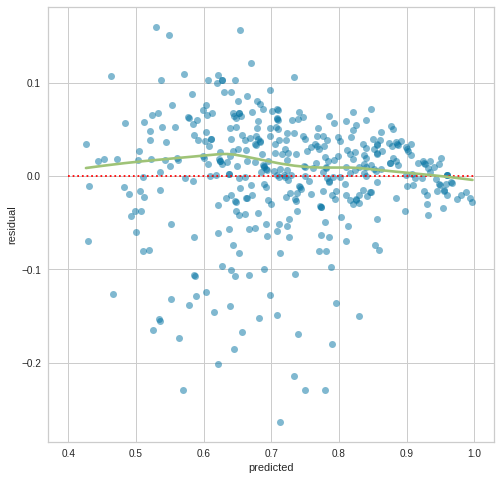

In [202]:
fig, ax = plt.subplots(figsize=(8,8))
sns.regplot(pred, resid, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'C1'},
            lowess=True)
ax.set_xlabel('predicted')
ax.set_ylabel('residual')
plt.hlines(0, 0.4, 1, color='red', linestyles='dotted');

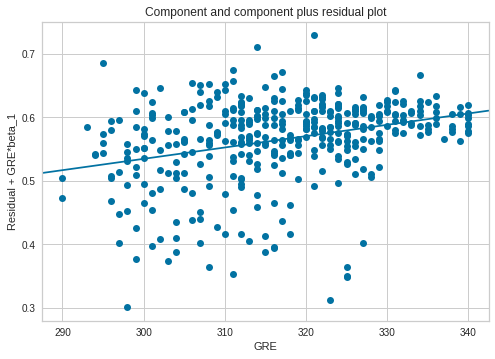

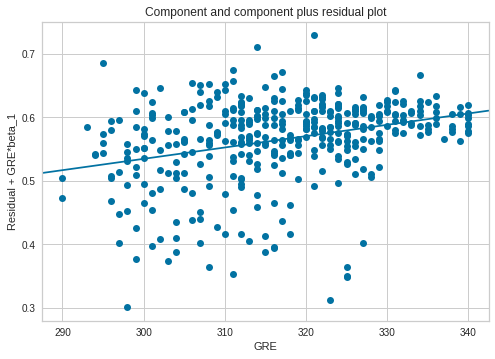

In [203]:
# Partial Regression Plot : 편잔차그림 
sm.graphics.plot_ccpr(stepwise_best_model, 'GRE') # 두개 그려짐 ㅠ.ㅜ 어짜피 설명변수 하나씩 보는 것... 

eval_env: 1


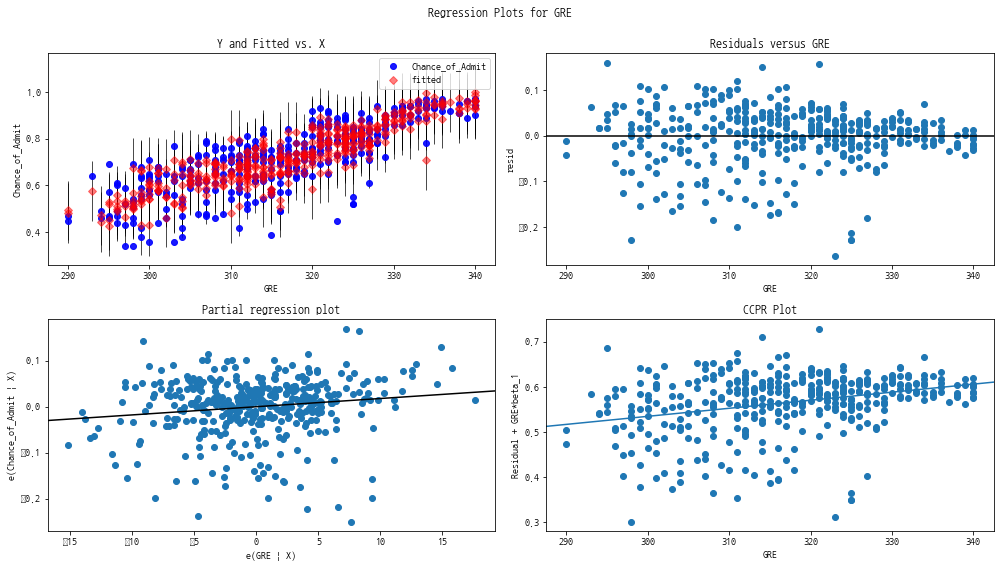

In [57]:
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(stepwise_best_model, 'GRE', fig=fig)  # 독립변수 한개씩만 됨. QQ플롯 없음 

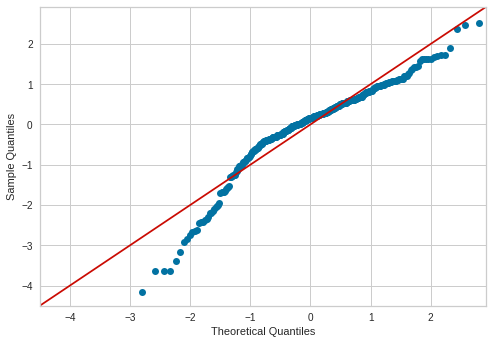

In [204]:
#https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
# https://acdongpgm.tistory.com/110

import scipy.stats as stats

fig = sm.qqplot(resid,  fit=True, line='45') 
#fig = sm.qqplot(stepwise_best_model.resid,  stats.t, distargs=(4,), line='s') 
#fig = sm.qqplot(stepwise_best_model.resid,  stats.t, distargs=(4,), line='45', fit=True) 

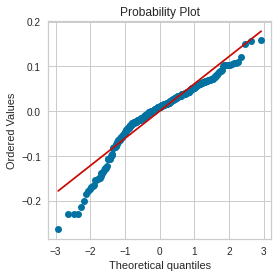

In [207]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(resid, plot=ax);

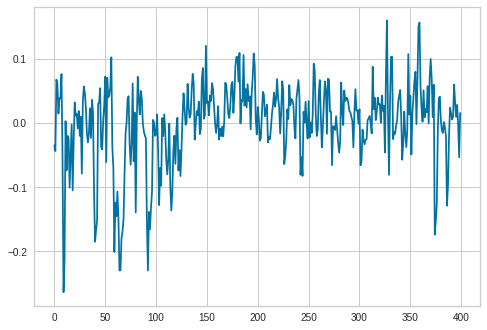

In [205]:
#검증 데이터에 대한 예측 : 특이값 있는지 확인
plt.plot(np.array(y).flatten() - pred,label="predFull")

In [138]:
#!pip install yellowbrick

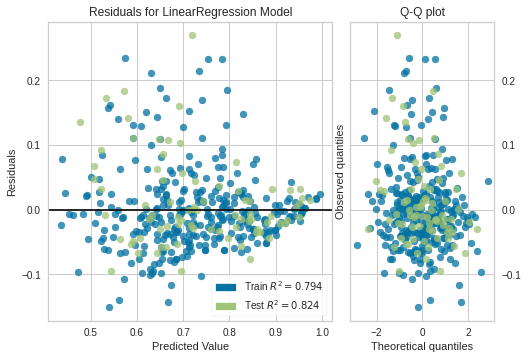

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [75]:
# yellowbrick (사이킷런 기반)  ---> QQ plot이 안그려짐 ㅠ.ㅜ 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Univ_Rating', 'SOP'], axis=1), y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

qqplot 안됨  ㅠ.ㅜ 

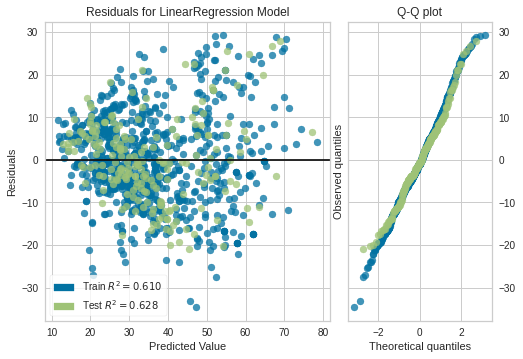

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [70]:
# 예제 : Load a regression dataset
X1, y1 = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [26]:
#############################
# 회귀분석 변수선택법 코드 
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

import time
import itertools


def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model	


def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X,columns.difference(['const']))+1):
    	Forward_result = forward(X=X,y=y,predictors=predictors)
    	if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
    	Fmodels.loc[i] = Forward_result
    	predictors = Fmodels.loc[i]["model"].model.exog_names
    	Fmodel_before = Fmodels.loc[i]["AIC"]
    	predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])
    

	
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model	


def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
    	Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
    	if Backward_result['AIC'] > Bmodel_before :
        	break
    	Bmodels.loc[len(predictors) -1] = Backward_result
    	predictors = Bmodel.loc[len(predictors) - 1]['model'].model.exog_names
    	Bmodel_before = Backward_result["AIC"]
    	predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])



# 단계적 선택법
def stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])	

### 정형 데이터 마이닝

In [221]:
titanic = pd.read_csv('datafiles/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [222]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S


In [223]:
titanic.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

<AxesSubplot:>

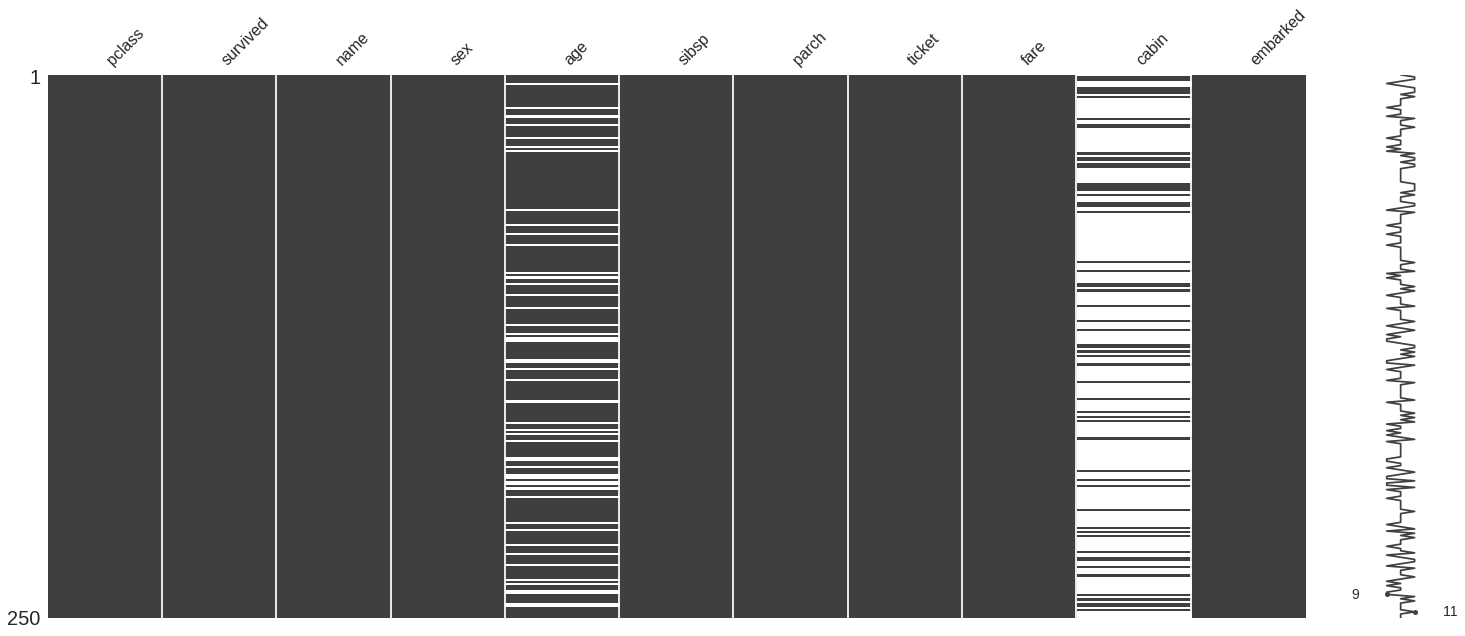

In [224]:
# 결측치 시각화 확인 
# https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=221623491491
import missingno as msno 

msno.matrix(titanic.sample(250))

<AxesSubplot:>

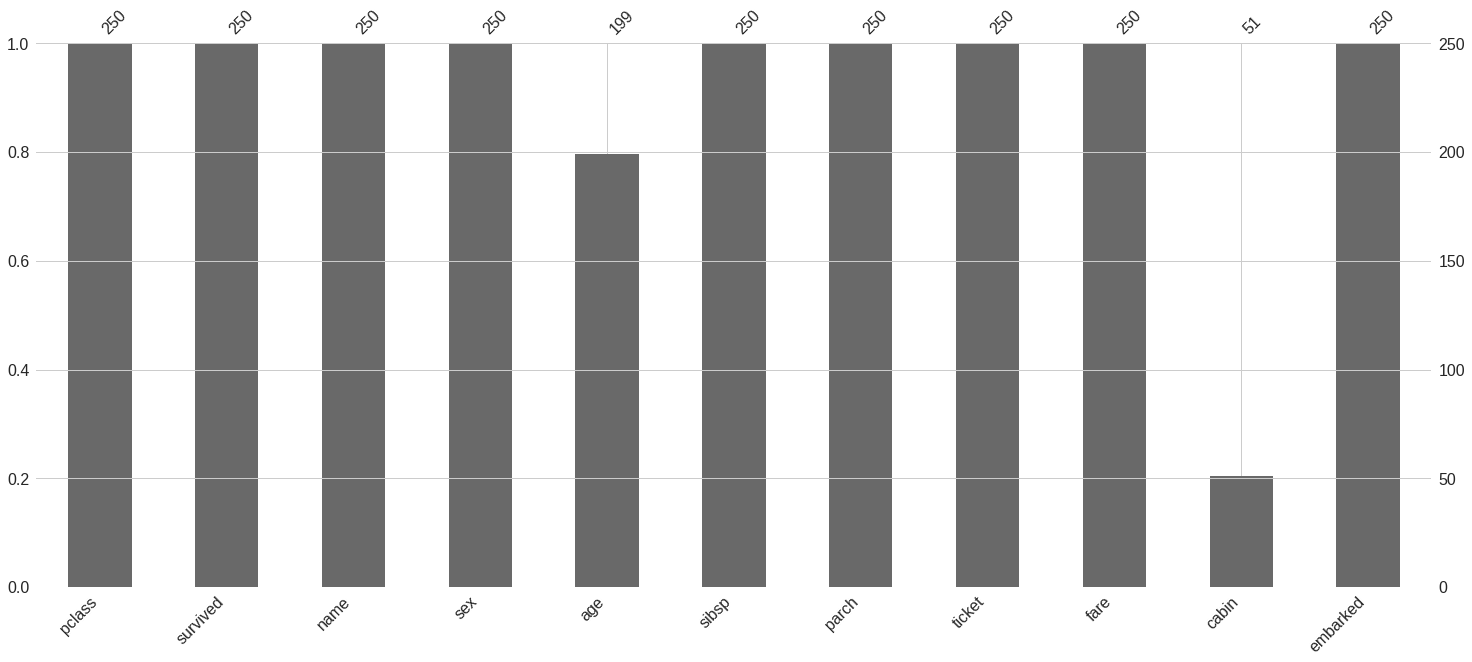

In [227]:
msno.bar(titanic.sample(250))

<AxesSubplot:>

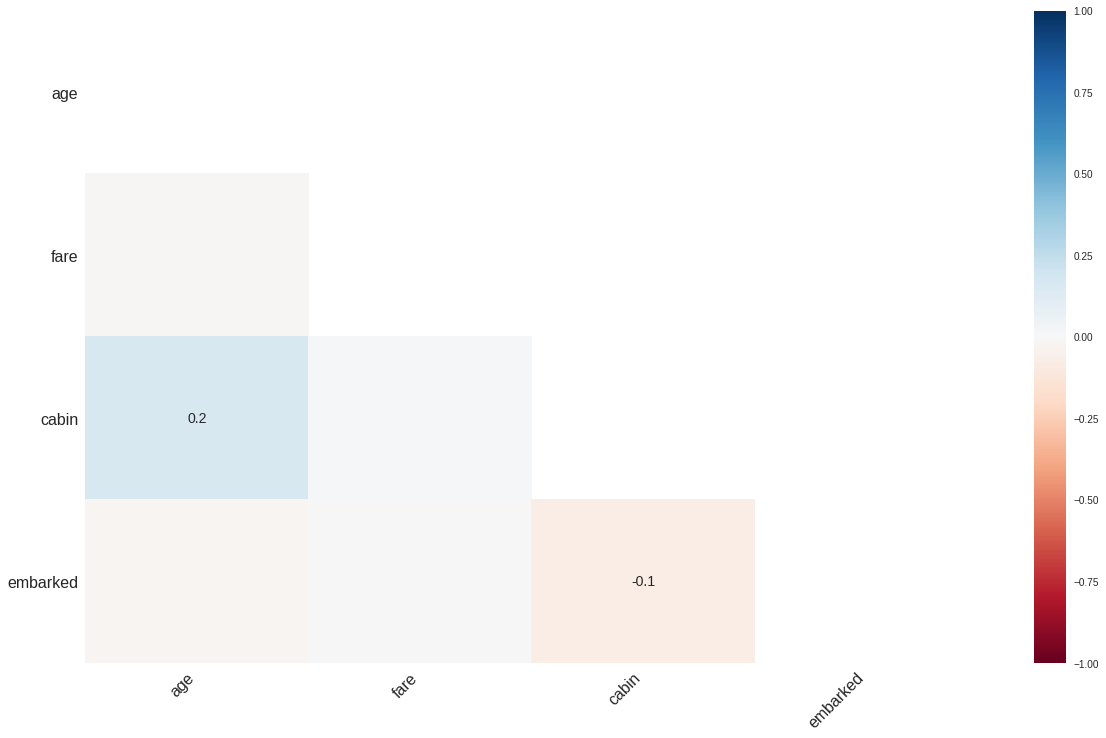

In [231]:
msno.heatmap(titanic)

<AxesSubplot:>

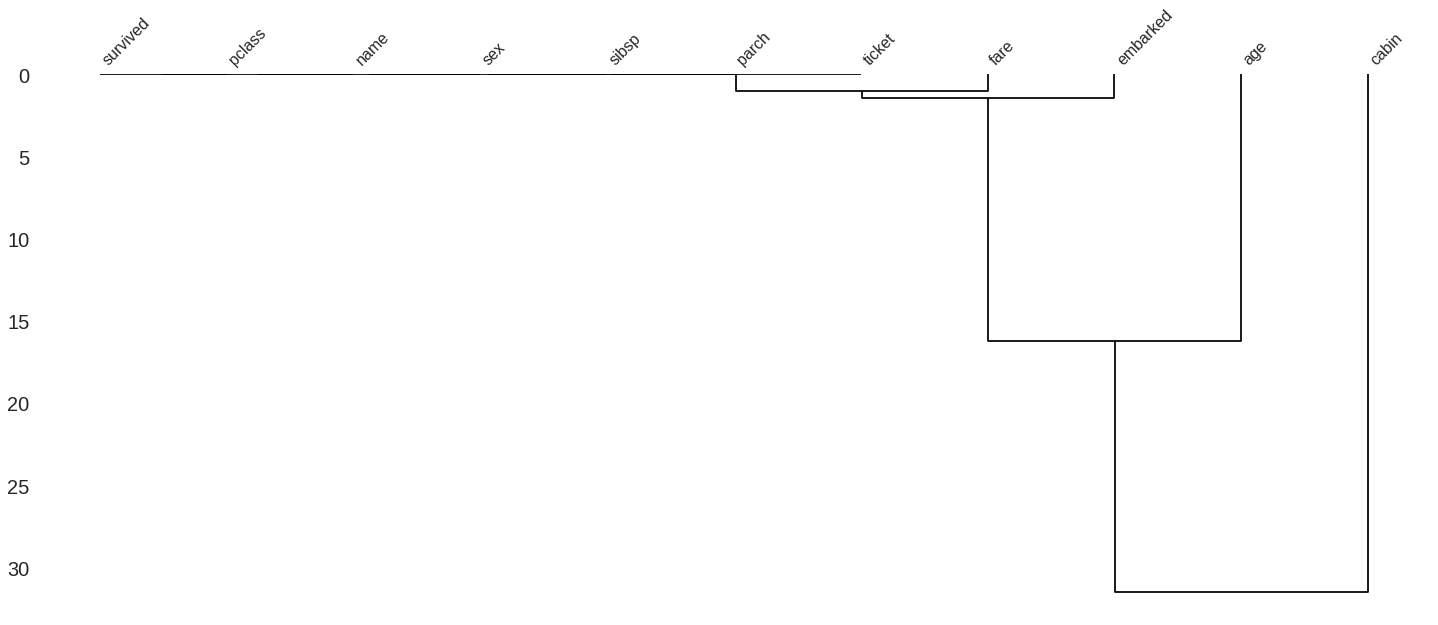

In [230]:
msno.dendrogram(titanic)

In [225]:
titanic.describe()  

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [226]:
for col in titanic.select_dtypes(include='object').columns:
    print(titanic[col].value_counts(dropna=False))
    print('='*30)

Connolly, Miss. Kate             2
Kelly, Mr. James                 2
Allen, Miss. Elisabeth Walton    1
Ilmakangas, Miss. Ida Livija     1
Ilieff, Mr. Ylio                 1
                                ..
Hart, Miss. Eva Miriam           1
Harris, Mr. Walter               1
Harris, Mr. George               1
Harper, Rev. John                1
Zimmerman, Mr. Leo               1
Name: name, Length: 1307, dtype: int64
male      843
female    466
Name: sex, dtype: int64
CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: ticket, Length: 929, dtype: int64
NaN                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
                   ... 
E63                   1
B102                  1
B39                   1
D40                   1
F38                   1
Name: cabin, Length: 187, dtype: int64
S      914
C    

In [272]:
# cabin과 embarked 결측 최빈값 대체, 수치형은 중앙값 대체 
mode_value = titanic['cabin'].mode()[0]
titanic['cabin'].fillna(mode_value, inplace=True)

In [273]:
mode_value = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(mode_value, inplace=True)

In [276]:
titanic['age'].fillna(titanic['age'].median(), inplace=True) 
titanic['fare'].fillna(titanic['fare'].median(), inplace=True) 

In [277]:
titanic.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [278]:
pd.cut??

In [293]:
titanic['age_1'] =  pd.cut(titanic['age'], 
                           bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 100], 
                           labels=[0,1,2,3,4,5,6,7,8])

In [294]:
titanic.groupby('age_1')['age'].agg(['min', 'max'])

,min,max
age_1,,
0,0.17,9.0
1,10.00,19.0
2,20.00,29.0
3,30.00,39.0
4,40.00,49.0
5,50.00,59.0
6,60.00,67.0
7,70.00,76.0
8,80.00,80.0


In [295]:
"""
>>> s = pd.Series(np.array([2, 4, 6, 8, 10]),
    ...               index=['a', 'b', 'c', 'd', 'e'])
>>> pd.cut(s, [0, 2, 4, 6, 8, 10], labels=False, retbins=True, right=False)
""";

In [373]:
# 데이터를 7:3으로 분류, seed는 12345 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cols = ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'survived']
df = pd.get_dummies(titanic[cols])

X = df.drop('survived', axis=1)
y = df[['survived']]

mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=12345)  # 로지스틱

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(916, 9) (393, 9) (916, 1) (393, 1)


In [356]:
# 3개 이상의 분류 모델 생성 
# 의사결정트리 
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve 

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       233
           1       0.76      0.70      0.73       160

    accuracy                           0.79       393
   macro avg       0.78      0.77      0.78       393
weighted avg       0.78      0.79      0.78       393

0.8106357296137339


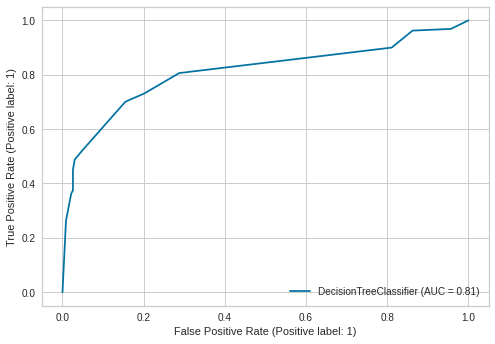

In [358]:
plot_roc_curve(dtc, X_test, y_test)
plt.show()

In [313]:
pd.DataFrame({'feats':X.columns, 'imp':dtc.feature_importances_}).sort_values(by='imp', ascending=False)

,feats,imp
4,sex_female,0.588907
0,pclass,0.221602
3,fare,0.138103
1,sibsp,0.023792
2,parch,0.016189
6,embarked_C,0.011407
5,sex_male,0.000000
7,embarked_Q,0.000000
8,embarked_S,0.000000


In [323]:
# 트리 시각화 
import pydot 
import pydotplus 
import graphviz 
from sklearn.tree import export_graphviz 

dt_dot_data = export_graphviz(dtc, feature_names=X.columns, 
                             class_names=np.array(['0','1']),
                             filled=True, rounded=True, special_characters=True)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
from IPython.display import Image
#Image(dt_graph.create_png())  -->  InvocationException: GraphViz's executables not found (설치경로 에러) 

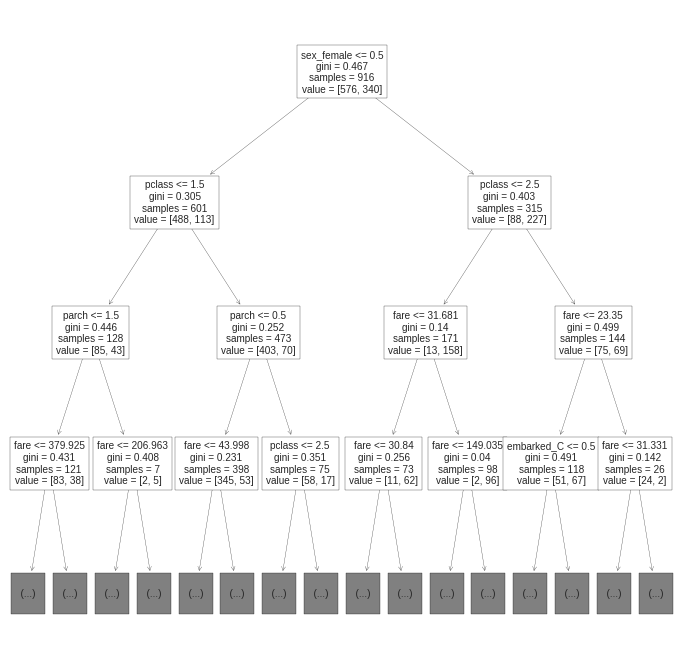

In [337]:
# 에러 뜨면, 간편하게 이걸로
from sklearn import tree

plt.figure(figsize=(12,12))
tree.plot_tree(dtc, max_depth=3, feature_names=X.columns, fontsize=10)
plt.show()

In [355]:
from sklearn.tree import export_text 
print(export_text(dtc, feature_names=list(X.columns), max_depth=3))  # feature_names는 반드시 리스트 형식! 

|--- sex_female <= 0.50
|   |--- pclass <= 1.50
|   |   |--- parch <= 1.50
|   |   |   |--- fare <= 379.93
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- fare >  379.93
|   |   |   |   |--- class: 1
|   |   |--- parch >  1.50
|   |   |   |--- fare <= 206.96
|   |   |   |   |--- class: 1
|   |   |   |--- fare >  206.96
|   |   |   |   |--- truncated branch of depth 2
|   |--- pclass >  1.50
|   |   |--- parch <= 0.50
|   |   |   |--- fare <= 44.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- fare >  44.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- parch >  0.50
|   |   |   |--- pclass <= 2.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- pclass >  2.50
|   |   |   |   |--- truncated branch of depth 2
|--- sex_female >  0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 31.68
|   |   |   |--- fare <= 30.84
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- fare >  30.84
|   |   |   |   |--- class

In [310]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       233
           1       0.77      0.66      0.71       160

    accuracy                           0.78       393
   macro avg       0.78      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393

0.8457215665236051


In [363]:
pd.DataFrame({'feats':X.columns, 'imp':rfc.feature_importances_}).sort_values(by='imp', ascending=False)

,feats,imp
4,sex_female,0.311939
5,sex_male,0.270848
3,fare,0.150695
0,pclass,0.137248
1,sibsp,0.049648
2,parch,0.042204
6,embarked_C,0.023755
8,embarked_S,0.010200
7,embarked_Q,0.003463


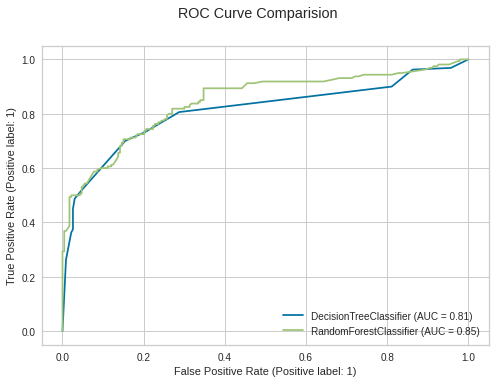

In [361]:
dtc_roc = plot_roc_curve(dtc, X_test, y_test)
rfc_roc = plot_roc_curve(rfc, X_test, y_test, ax=dtc_roc.ax_)
rfc_roc.figure_.suptitle("ROC Curve Comparision")
plt.show()

In [384]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       233
           1       0.73      0.68      0.71       160

    accuracy                           0.77       393
   macro avg       0.76      0.75      0.76       393
weighted avg       0.77      0.77      0.77       393

0.8217811158798283


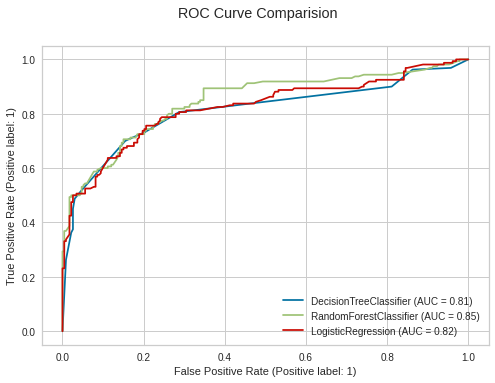

In [385]:
dtc_roc = plot_roc_curve(dtc, X_test, y_test)
rfc_roc = plot_roc_curve(rfc, X_test, y_test, ax=dtc_roc.ax_)
lr_roc = plot_roc_curve(lr, X_test, y_test, ax=dtc_roc.ax_)
lr_roc.figure_.suptitle("ROC Curve Comparision")
plt.show()

In [372]:
pd.DataFrame({'feats':X.columns, 'coef':lr.coef_.flatten()}).sort_values(by='coef', ascending=False)  # flatten 유의 

,feats,coef
4,sex_female,1.319762
6,embarked_C,0.286583
3,fare,0.003272
8,embarked_S,-0.038881
2,parch,-0.085397
7,embarked_Q,-0.243445
1,sibsp,-0.320878
0,pclass,-0.669438
5,sex_male,-1.315506


In [378]:
# 스케일데이터로 로지스틱 
lrs = LogisticRegression()
lrs.fit(X_train_scaled, y_train)
pred = lrs.predict(X_test_scaled)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, lrs.predict_proba(X_test_scaled)[:,1]))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       233
           1       0.75      0.69      0.72       160

    accuracy                           0.78       393
   macro avg       0.77      0.76      0.77       393
weighted avg       0.78      0.78      0.78       393

0.8326448497854078


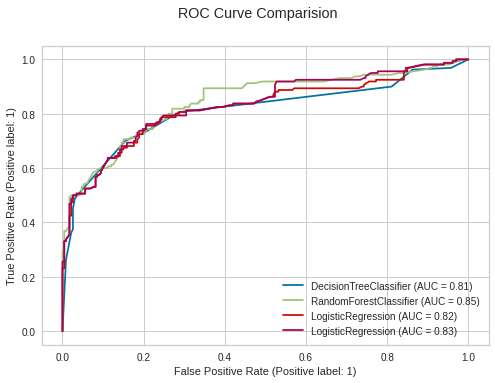

In [386]:
dtc_roc = plot_roc_curve(dtc, X_test, y_test)
rfc_roc = plot_roc_curve(rfc, X_test, y_test, ax=dtc_roc.ax_)
lr_roc = plot_roc_curve(lr, X_test, y_test, ax=dtc_roc.ax_)
lrs_roc = plot_roc_curve(lrs, X_test_scaled, y_test, ax=dtc_roc.ax_)
lrs_roc.figure_.suptitle("ROC Curve Comparision")
plt.show()

스케일 조정시 ROC 살짝 올라감 

In [387]:
pd.DataFrame({'feats':X.columns, 'coef':lrs.coef_.flatten()}).sort_values(by='coef', ascending=False)  # flatten 유의 

,feats,coef
4,sex_female,1.283561
3,fare,0.654359
6,embarked_C,0.299385
8,embarked_S,-0.079114
7,embarked_Q,-0.220596
2,parch,-0.509334
5,sex_male,-1.283886
0,pclass,-1.419812
1,sibsp,-1.571482


In [388]:
y_test

,survived
1097,0
281,1
1032,0
942,0
1263,0
...,...
993,1
928,0
955,0
392,1


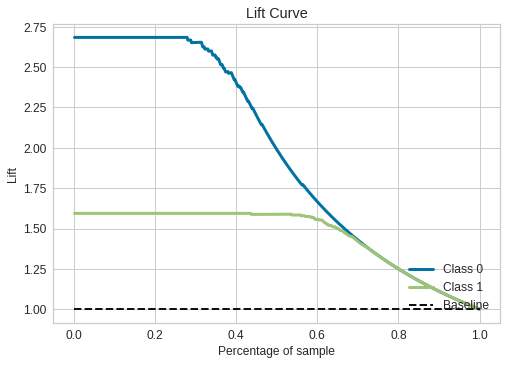

In [423]:
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data
import scikitplot as skplt


X1, y1 = load_data(return_X_y=True)
lr = LogisticRegression()
lr.fit(X1, y1)
probas = lr.predict_proba(X1)
skplt.metrics.plot_lift_curve(y_true=y1, y_probas=probas)
plt.show()

In [424]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [425]:
probas

array([[1.00000000e+00, 3.98643823e-15],
       [9.99999971e-01, 2.91657035e-08],
       [9.99999773e-01, 2.27043565e-07],
       ...,
       [9.92739259e-01, 7.26074086e-03],
       [1.00000000e+00, 1.65243137e-10],
       [2.43701072e-02, 9.75629893e-01]])

In [407]:
# !pip install scikit-plot
import scikitplot as skplt

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

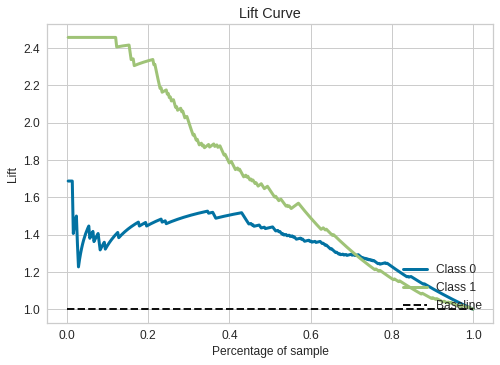

In [427]:
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=rfc.predict_proba(X_test)) 

In [428]:
#skplt.metrics.plot_lift_curve?

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

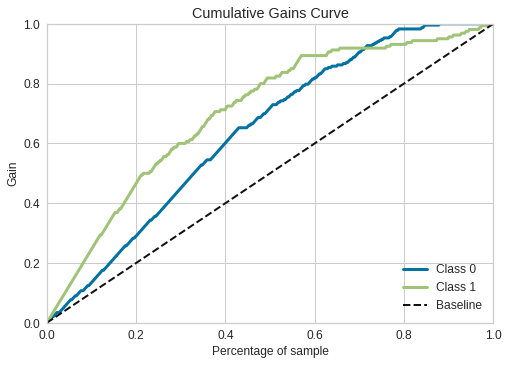

In [429]:
skplt.metrics.plot_cumulative_gain(y_test, rfc.predict_proba(X_test))

### 별첨 : yellowbrick 라이브러리 

In [389]:
from yellowbrick.classifier import ROCAUC

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

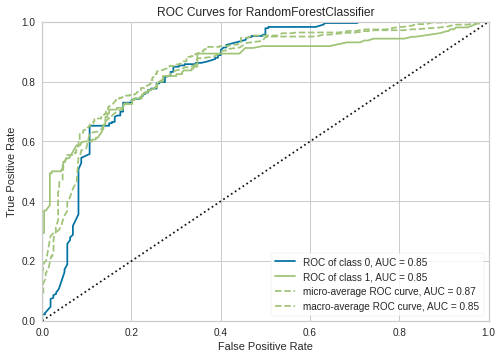

In [390]:
visualizer = ROCAUC(rfc)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

<AxesSubplot:title={'center':'Pearson Ranking of 9 Features'}>

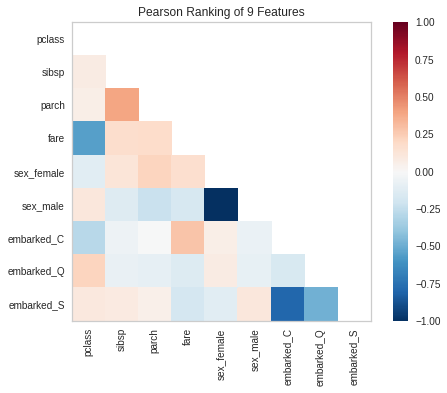

In [394]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(
    features=X.columns, algorithm='pearson'
)
visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
visualizer.transform(X_train)             # Transform the data
visualizer.show()                   # Finalize and render the figure

In [398]:
#from yellowbrick.regressor import ResidualsPlot  #--> 회귀분석만 됨 ㅋ 로지스틱 X 

#visualizer = ResidualsPlot(LinearRegression())
#visualizer.fit(X_train, y_train)
#visualizer.score(X_test, y_test)
#visualizer.show()

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

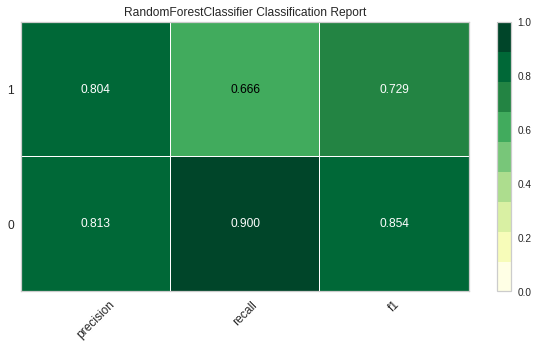

In [402]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
        rfc, # classes=['edible', 'poisonous'],
        cmap="YlGn", size=(600, 360),
    )
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show()